In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw05.ipynb")

# Homework 5A: Sampling
## Due Date: Thursday, October 5th, 11:59 PM

You must submit this assignment to Gradescope by the on-time deadline, Thursday, October 5th, 11:59 PM. Please read the syllabus for the grace period policy. No late submissions beyond the grace period will be accepted. While course staff is happy to help you if you encounter difficulties with submission, we may not be able to respond to last-minute requests for assistance (TAs need to sleep, after all!). **We strongly encourage you to plan to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to reach out to staff for submission support. 

This is part of a two-part assignment. After completing this part ("Homework 5A"), please read all instructions carefully to combine manually graded questions from Homework 5A with Homework 5B, and submit your work to both the coding and written portals of Gradescope.

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** at the top of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment

The purpose of this assignment is for you to understand the process of sampling: including convenience samples, random samples; as well as sampling biases. We will also practice drawing samples from a categorical distribution using `NumPy`.

For the purposes of clarity, we will refer to all variations of this class (Data 100/200/200A/200S) as Data 100 in this homework. 

## Score Breakdown
Question | Manual? | Points
--- | --- | --
1ai | No | 1
1aii | No | 1
1aiii | No | 1
1bi | No | 1
1bii | No | 1
1biii | No | 1
1biv | No | 1
2a | No | 2
2b | Yes | 2
2c | Yes | 3
2d | Yes | 2
Total | 3 | 16


### Initialize your environment

In [2]:
import numpy as np
np.random.seed(200)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Data 100 Cutest Pets Contest

Welcome to the Data 100 Cutest Pets Contest, Fall 2023 edition! Course staff nominate their pets to participate in this contest. Students will vote on the cutest one among the nominations in the final exam.

The nominees are:

<img src='images/appa.jpg' width="180px" />  <img src='images/pishi.png' width="180px" /> <img src='images/mimi.png' width="180px" /> 

(From left to right) **Appa** (Matthew's cats), **Pishi** (Professor Norouzi's cat), and **Mimi** (Shiny's dog).

**Earlier in the semester, before the actual contest**, however, course staff would like to predict the results by surveying students in the class. This process is similar to polling that occurs before a political election.

In this section, you are going to explore different sampling methods.
<br/><br/>

<hr style="border: 1px solid #fdb515;" />

## Question 1

<br>

---

### Question 1a

Since her dog, Mimi, is nominated, Shiny would like to understand the class opinion before the contest. This coming week, she decided to survey all students enrolled in Data 100 this Fall semester (Fall 2023) by sending out an Ed announcement via email that asked students to choose the cutest from the three pets. You may assume no other students/users receive the survey. Shiny closes the survey 12 hours after sending it out.

You can assume that all, and only, enrolled students are on Ed.

**Part 1**. In Shiny's survey, which of the following is the population of interest? Assign your answer choice to `q1ai` (e.g., `'A'`, `'B'`, etc.).

A. All UC Berkeley students<br/>
B. All students enrolled in Data 100 across all semesters (Fall 2023 and previous)</br>
C. All students enrolled in Data 100 for this semester (Fall 2023)<br/>
D. All students who fill out Shiny's survey

In [3]:
q1ai = "C"

In [4]:
grader.check("q1ai")

q1ai results: All test cases passed!

**Part 2**. In Shiny's survey, which of the following is the sampling frame? Assign your answer choice to `q1aii` (e.g., `'A'`, `'B'`, etc.).

A. UC Berkeley students<br/>
B. All students enrolled in Data 100 across all semesters (Fall 2023 and previous)</br>
C. All students enrolled in Data 100 for this semester (Fall 2023)<br/>
D. All students who fill out Shiny's survey

In [5]:
q1aii = "D"

In [6]:
grader.check("q1aii")

q1aii results: All test cases passed!



**Part 3**. Which of the following is the sample? Assign your answer choice to `q1aiii` (e.g., `'A'`, `'B'`, etc.).

A. UC Berkeley students<br/>
B. All students enrolled in Data 100 across all semesters (Fall 2023 and previous)</br>
C. All students enrolled in Data 100 for this semester (Fall 2023)<br/>
D. All students who fill out Shiny's survey

In [7]:
q1aiii = "D"

In [8]:
grader.check("q1aiii")

q1aiii results: All test cases passed!

<br><br>

---

### Question 1b

In practice, we cannot get a 100\% survey response rate, often because our population is too large, or because there is a time limit. In this case, very few students answered Shiny's survey before she closed it.

To get more data to predict the answer to the original question ("Which pet will win the Data 100 Cutest Pet Contest?"), Shiny decides on a different strategy: **She conducts the pre-contest survey in person in her discussion section that same week**. She then asks every student who attends the discussion that week for their opinion on the cutest of the three pets, by presenting the following slide: 

<img src='images/survey.png' width="600px" />



**Part I:** In this sampling scheme, which of the following is the population of interest? Assign your answer choice to `q1bi` (e.g., `'A'`, `'B'`, etc.).

A. UC Berkeley students<br/>
B. All students enrolled in Data 100 across all semesters (Fall 2023 and previous)</br>
C. All students enrolled in Data 100 for this semester (Fall 2023)<br/>
D. All students enrolled in Shiny's discussion section<br/>
E. All students who fill out Shiny's pre-contest survey

In [14]:
q1bi = "C"

In [15]:
grader.check("q1bi")

q1bi results: All test cases passed!


**Part II:** In this sampling scheme, which of the following is the sampling frame? Assign your answer choice to `q2bii` (e.g., `'A'`, `'B'`, etc.).

A. UC Berkeley students<br/>
B. All students enrolled in Data 100 across all semesters (Fall 2023 and previous)</br>
C. All students enrolled in Data 100 for this semester (Fall 2023)<br/>
D. All students enrolled in Shiny's discussion section<br/>
E. All students who fill out Shiny's pre-contest survey

In [16]:
q1bii = "D"

In [17]:
grader.check("q1bii")

q1bii results: All test cases passed!


**Part III:** Which of the following is the sample? Assign your answer choice to `q2biii` (e.g., `'A'`, `'B'`, etc.).

A. UC Berkeley students<br/>
B. All students enrolled in Data 100 across all semesters (Fall 2023 and previous)</br>
C. All students enrolled in Data 100 for this semester (Fall 2023)<br/>
D. All students enrolled in Shiny's discussion section<br/>
E. All students who fill out Shiny's pre-contest survey

In [18]:
q1biii = "E"

In [19]:
grader.check("q1biii")

q1biii results: All test cases passed!

**Part IV:** Which of the following best characterizes the sample? Assign your answer choice to `q1biv`  (e.g., `'A'`, `'B'`, etc.)..

A. Convenience Sample<br/>
B. Simple Random Sample<br/>
C. Probability Sample

In [22]:
q1biv = "A"

In [85]:
grader.check("q1biv")

q1biv results: All test cases passed!

<br>

<hr style="border: 1px solid #fdb515;" />


## Question 2
Shiny was able to sample 50 students in her section; the results are as follows:

Pet | Vote Share
--- | ---
Appa | 2%
Pishi | 20%
Mimi | 78%

Based on this result, she predicts that her dog Mimi will win the contest.

Fast-forward to the end of the semester, when the contest has actually taken place. Assume that after tallying every student's votes, **the true popularity of each pet** is: 

Dog | Vote Share
--- | ---
Appa | 10%
Pishi | 82%
Mimi | 8%

The true winner was actually Pishi! Shiny was devastated: what went wrong?

---

### Question 2a

Pishi ultimately wins the Cutest Pet Contest, but from Shiny's results, it was predicted that Mimi would win. Perhaps there was some underlying issue with Shiny's sampling method.

Probability samples can help us quantify sampling bias and chance error. Put briefly, if we assume that a sample distribution was selected at random from a known population, then we can quantify how likely that sample is to have arisen due to random chance (**chance error**). If the difference in sample and population distributions is too great, then we suspect that the given sample has **bias** in how it was selected from the population.

Write one line of code that runs 1000 independent simulations, where each simulation finds the proportion of voters who voted for **Pishi** in a sample of size 50, selected uniformly at random from the **true population**. You may assume that the true population is large enough such that the sample is a random sample with replacement. The output `samples` should be an array with 1000 elements, each of which is the proportion of **Pishi** votes in that simulated sample.

**Hint**: 

* Use `np.random.multinomial` ([documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html)).
* Use `array[:, i]` to select the i-th column of a 2D `NumPy` array
* Feel free to print out `samples` or `samples.shape` to check the output!

In [62]:
samples = np.random.multinomial(50, [0.1, 0.82, 0.08], size=1000)
samples = samples[:, 1] / 50
samples[:5]

array([0.88, 0.8 , 0.84, 0.82, 0.84])

In [63]:
grader.check("q2a")

q2a results: All test cases passed!

<!-- BEGIN QUESTION -->

<br>

---

### Question 2b

Create a plot using any `seaborn` and/or `matplotlib.pyplot` functions of your choice to visualize `samples`, which is the simulated distribution of Pishi votes using a sample of size 50. Include descriptive titles and labels. An example is included below. The total area under the plot must be normalized to 1. Your plot may not match exactly ours due to randomness of the data generating process in `np.random.multinomial`.

<img src='images/q2b.png' width="500px" />


**Hint**: use `plt.xlim(left, right)` [(documentation)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) to specify the left and right limits of the x-axis.

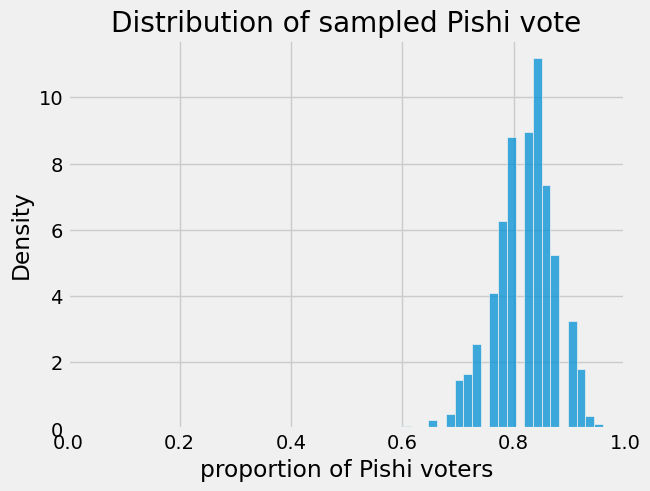

In [64]:
sns.histplot(samples, stat = "density")
plt.title("Distribution of sampled Pishi vote")
plt.xlabel("proportion of Pishi voters")
plt.xlim(0, 1)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

---

### Question 2c

According to Shiny's 50-person sample, 20\% of her discussion section reported that they would vote for Pishi in the end-of-semester contest.

In the cell below, create a plot using any `seaborn` and/or `matplotlib.pyplot` functions of your choice to visualize Shiny's sample statistic superimposed on the simulated sample distribution you plotted in the previous part. In other words, include
- a vertical line that passes through 20\%, 
- a vertical line that passes through the mean of the simulated sample distribution, and 
- the simulated sample distribution itself. 

You should choose contrasting colors and include a descriptive title, labels, and a legend if needed. An example is included below.

<img src='images/q2c.png' width="500px" />

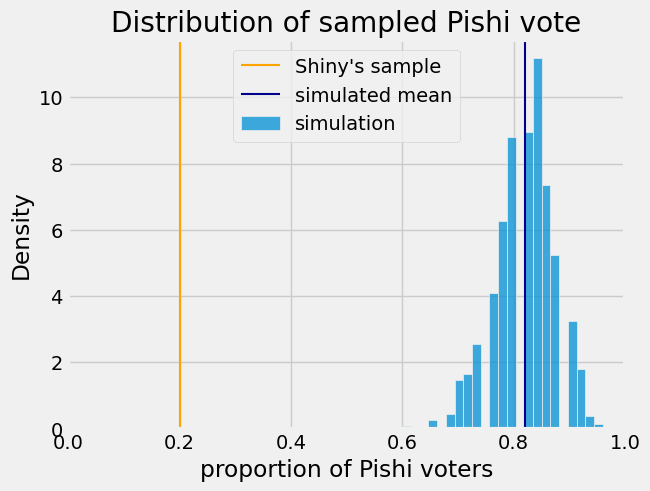

In [84]:
sns.histplot(samples, stat = "density", label = "simulation")
plt.title("Distribution of sampled Pishi vote")
plt.xlabel("proportion of Pishi voters")
plt.xlim(0, 1)

plt.axvline(0.2, color='orange', label= "Shiny's sample", linewidth=1.5 )
plt.axvline(np.mean(samples), color='darkblue',  label='simulated mean', linewidth=1.5)

plt.legend()

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

---

### Question 2d

Based on your analysis above, could Shiny's result have arisen due to chance alone? If not, what could be a potential source of bias?

No it very less likely that Shiny's result is due to chance alone because the Shiny's sample is very far from the distribution. There may be sampling bias- perhaps Shiny's section had a disproportionate number of Mimi fans compared to the target population.

<!-- END QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 5A!

### Submission Instructions

Below, you will see two cells.
* Running the first cell will automatically generate a PDF of your answers to all questions that need to be manually graded.
* Running the second cell will automatically generate a zip with your autograded answers.

**You are responsible for combining this resulting Homework 5A PDF with your answers to Homework 5B**, then submitting **both** the coding and written portions of Homework 5 to their respective Gradescope portals:
* **Homework 05 Coding**: Submit your Jupyter notebook zip file for Homework 5A,
which can be generated and downloaded from DataHub by using the `grader.export()`
cell provided below.
* **Homework 05 Written**: Submit a single PDF to Gradescope that contains both
(1) your answers to all manually graded questions from this Homework 5A Jupyter
Notebook, and (2) your answers to all questions in Homework 5B.

To receive credit on this assignment, **you must submit both your coding and written
portions to their respective Gradescope portals.** Your written submission (a single
PDF) can be generated as follows:

1. Access your answers to manually graded Homework 5A  questions in one of three ways:
      * <b>*Automatically create PDF (recommended)*</b>: Run the first cell below and download the generated PDF. This function will extract your response to the manually graded questions and put them on a separate page. This process may fail if your answer is not properly formatted; if this is the case, check out common errors and solution described on Ed or follow either of the two ways described below.
      * *Manually download PDF*: If there are issues with automatically generating the PDF in the first cell, you can try downloading the notebook as a PDF by clicking on `File -> Save and Export Notebook As... -> PDF`. If you choose to go this route, you must take special care to ensure all appropriate pages are chosen for each question on Gradescope.
      * *Take screenshots*: If that doesn't work either, you can take screenshots of your answers (and your code if present) to manually graded questions and include them as images in a PDF. The manually graded questions are listed at the top of the Homework 1A notebook.
    
1. Answer the Homework 5B written questions.

1. Combine these two sets of answers together into the same PDF, and submit to the appropriate Gradescope written portal. You can use PDF merging tools, e.g., [Adobe Reader](https://get.adobe.com/reader/), [Smallpdf](https://smallpdf.com/merge-pdf) or [Apple Preview](https://support.apple.com/en-us/HT202945).

1. **Important**: When submitting on Gradescope, you **must tag pages to each question correctly** (it prompts you to do this after submitting your work). This significantly streamlines the grading process for our readers. Failure to do this may result in a score of 0 for untagged questions.

**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

After you have run the cell below and generated the zip file, you can open the PDF <a href='hw05A.pdf' download>here</a>.

In [86]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1ai results: All test cases passed!

    q1aii results: All test cases passed!

    q1aiii results: All test cases passed!

    q1bi results: All test cases passed!

    q1bii results: All test cases passed!

    q1biii results: All test cases passed!

    q1biv results: All test cases passed!

    q2a results: All test cases passed!
